# 3.3.2 & 3.3.3 [Lasso Regression](https://courses.thinkful.com/data-201v1/project/3.3.3) vs. [Ridge Regression](https://courses.thinkful.com/data-201v1/project/3.3.2)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [3]:
## Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. 

* Use logic and code similar to the ridge regression demonstration above.  * base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?



In [10]:
lambd = 2
ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
ridgeregrBig.score(X_test2, Y_test)

0.5631012998121807

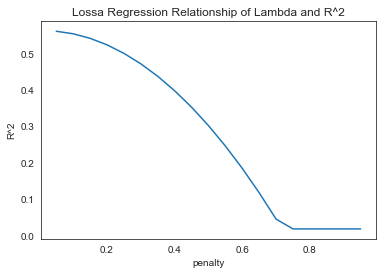

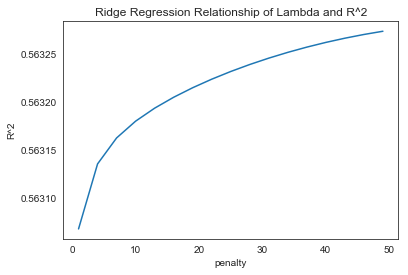

In [40]:
# Store R^2.
r_squared_ridge = []
r_squared_lasso = []

# Storing legend information.
ridge_penalty = []
lass_penalty = []
labels = []
#Run the model for many alphas.
for lambd in np.arange(1, 50, 3):
    ridge_penalty.append(lambd)
    
    ridgeregr = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregr.fit(X_train2, Y_train)
    r_squared_ridge.append(ridgeregr.score(X_test2, Y_test))
    
# Make the data pretty.
df_ridge = pd.DataFrame(data = {'ridge':r_squared_ridge,
                                'penalty': ridge_penalty}
                          )
df_ridge.sort_values(by='penalty', inplace=True, ascending=True)


# Run Lasso
for lambd in np.arange(0.05, 1.0, .05):
    lass_penalty.append(lambd)

    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X_train2, Y_train)
    r_squared_lasso.append(lass.score(X_test2, Y_test))
    
# Make the data pretty.
df_lasso = pd.DataFrame(data = {'lasso':r_squared_lasso,
                                'penalty': lass_penalty}
                          )
df_lasso.sort_values(by='penalty', inplace=True, ascending=True)

# Plot a line for each parameter.

plt.plot(df_lasso['penalty'], df_lasso['lasso'])
plt.xlabel('penalty')
plt.ylabel('R^2')
plt.title('Lossa Regression Relationship of Lambda and R^2')
plt.show()

plt.plot(df_ridge['penalty'], df_ridge['ridge'])
plt.xlabel('penalty')
plt.ylabel('R^2')
plt.title('Ridge Regression Relationship of Lambda and R^2')
plt.show()

# Improving on OLS
* more accurate *predictions* can be found by modifying the OLS cost function.
* THe OLS cost function optimizes variance explained *in the training set*
* Ridge and lasso regressions modify the cost function to optimize variance explained *in the test sets*


### Ridge Regression:
* Same cost function as ols but also includes section that imposes penalty for lare coefficients.
* penalty represents the sum of the square of all model coefficients from 1 to p (number of coefficients). multiplied by the regularization parameter lambda
* as lamdba get larger the penalty for coefficient size also gets larger and the solution that ninimizes the cost function will by necessity have snaller coefficient estimates
* Shrinks parameter estimates but estimates never reach exactly 0
* Cost function: penalizs by the sum of **squared** coefficients
* **L2 regularization** regularization based on the sum of squared weights
* **Core Principal**: as models become increasingly complex and features correlate with one anothe rmore and more (become multicolinear)m coefficients arrived at by OLS beomce increasingly large (bc it is incorporating too uch variance from the dataset)

### LASSO (Least Absolute Shrinkage and Selection Operator)
* model optimization that works by trying to force small parameter estimates to be equal to zero, effectively dropping them from the model
* Cost function: penalizes by the sum of the **absolute values** of the coefficients e.g. penalty does not increase as swiftly with coefficient size as it does with Ridge Regression
* **L1 regularization**: Regularization based on the sum of absolute weights
* Lasso Regression models are optimized using coordinate descent rather than gradient descent
* **coordinate descent** iteratively fits a model to data wile excluding one of the featues, then checks how well the model reproduces the data, if the model fit is good enough without the feature it is deemed unnecessary and its coefficient is set to zero, otherwise the coefficient is set using a combination of correlation of the feature with the model residuals. A new iteration begins using the newly calculated coefficient and excluding a new feature. 
* Pros: 
    * prevents overfitting 
    * works as embedded feature selection
    * handy when you are dealing with large number of predictors and need to optimize processor time
    * provides simpler solution easier to interpret
    
#### Regularization parameter for lasso
the lambda for lasso can vary between 0 (no penalty acts like OLS) and infinity.
* if lamdba is too large all parameters will be set to zero